In [275]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [276]:
df = pd.read_csv('House.csv')

In [277]:
len(df)

2772

In [278]:
df['price'] = df['price'].apply(lambda x : x.split('A')[0])

In [279]:
df['price'] = df['price'].apply(lambda x : x.replace(' ', ''))
df

,price,location,detail
0,351000,28 May m.,3 otaqlı135 m²7/16 mərtəbə
1,52500,Masazır q.,2 otaqlı55 m²5/6 mərtəbə
2,500000,Nəriman Nərimanov m.,4 otaqlı160 m²7/8 mərtəbə
3,145000,Qara Qarayev m.,2 otaqlı52 m²15/17 mərtəbə
4,2965000,Nizami m.,8 otaqlı872 m²15/16 mərtəbə
5,139000,20 Yanvar m.,2 otaqlı48 m²5/20 mərtəbə
6,1398000,Nərimanov r.,6 otaqlı395 m²8/9 mərtəbə
7,495000,Nəsimi r.,4 otaqlı200 m²13/15 mərtəbə
8,360000,Nəsimi r.,3 otaqlı206 m²8/16 mərtəbə
9,176000,Qara Qarayev m.,2 otaqlı72 m²2/16 mərtəbə


In [280]:
df['room'] = df['detail'].apply(lambda x: x.split('otaqlı')[0])

In [281]:
df['area'] = df['detail'].apply(lambda x: x.split('m²')[0])
df

,price,location,detail,room,area
0,351000,28 May m.,3 otaqlı135 m²7/16 mərtəbə,3,3 otaqlı135
1,52500,Masazır q.,2 otaqlı55 m²5/6 mərtəbə,2,2 otaqlı55
2,500000,Nəriman Nərimanov m.,4 otaqlı160 m²7/8 mərtəbə,4,4 otaqlı160
3,145000,Qara Qarayev m.,2 otaqlı52 m²15/17 mərtəbə,2,2 otaqlı52
4,2965000,Nizami m.,8 otaqlı872 m²15/16 mərtəbə,8,8 otaqlı872
5,139000,20 Yanvar m.,2 otaqlı48 m²5/20 mərtəbə,2,2 otaqlı48
6,1398000,Nərimanov r.,6 otaqlı395 m²8/9 mərtəbə,6,6 otaqlı395
7,495000,Nəsimi r.,4 otaqlı200 m²13/15 mərtəbə,4,4 otaqlı200
8,360000,Nəsimi r.,3 otaqlı206 m²8/16 mərtəbə,3,3 otaqlı206
9,176000,Qara Qarayev m.,2 otaqlı72 m²2/16 mərtəbə,2,2 otaqlı72


In [282]:
df['detail'] = df['detail'].apply(lambda x: x.split('m²')[1])
df['floor'] = df['detail'].apply(lambda x: x.split(' ')[0])

In [283]:
df.drop('detail', axis=1, inplace=True)

In [284]:
for col in ['price','room']:
    df[col] = df[col].astype('int')

In [285]:
df['location'] = df['location'].astype('category')

In [286]:
df['area'] = df['area'].apply(lambda x:x.split('otaqlı')[1])

In [287]:
df['area'] = df['area'].astype('float')

In [288]:
df[['current_floor', 'max_floor']] = df['floor'].str.split('/', expand=True)

In [289]:
for col in ['current_floor','max_floor']:
    df[col] = df[col].astype('int')

In [290]:
df.drop('floor', axis=1, inplace=True)

In [291]:
df.columns = ['price', 'location', 'room', 'area', 'current floor', 'max floor']

In [292]:
pd.set_option('display.max_rows', None)

In [293]:
print(df['location'].nunique())
print()
print(df['location'].value_counts())

72

location
Şah İsmayıl Xətai m.     182
Nəsimi r.                182
28 May m.                172
Nəriman Nərimanov m.     166
Elmlər Akademiyası m.    149
Həzi Aslanov m.          134
İnşaatçılar m.           126
Nərimanov r.             122
20 Yanvar m.             109
Nizami m.                 99
Ağ şəhər q.               95
8 Noyabr m.               89
Gənclik m.                75
Memar Əcəmi m.            75
Qara Qarayev m.           73
Əhmədli m.                70
Nardaran q.               61
Azadlıq Prospekti m.      61
Masazır q.                60
Xətai r.                  57
Xalqlar Dostluğu m.       53
Neftçilər m.              53
Yasamal r.                35
Yeni Yasamal q.           33
Bakıxanov q.              31
İçəri Şəhər m.            30
Nəsimi m.                 29
Yeni Günəşli q.           28
Səbail r.                 25
Yasamal q.                23
Sahil m.                  21
Bayıl q.                  21
Badamdar q.               16
9-cu mikrorayon q.        15
Ə

In [294]:
category_counts = df['location'].value_counts()

In [295]:
df['location'] = df['location'].apply(lambda x: 'Other' if category_counts[x] < 21 else x)

In [296]:
print(df['location'].nunique())
print()
print(df['location'].value_counts())

33

location
Other                    233
Nəsimi r.                182
Şah İsmayıl Xətai m.     182
28 May m.                172
Nəriman Nərimanov m.     166
Elmlər Akademiyası m.    149
Həzi Aslanov m.          134
İnşaatçılar m.           126
Nərimanov r.             122
20 Yanvar m.             109
Nizami m.                 99
Ağ şəhər q.               95
8 Noyabr m.               89
Memar Əcəmi m.            75
Gənclik m.                75
Qara Qarayev m.           73
Əhmədli m.                70
Azadlıq Prospekti m.      61
Nardaran q.               61
Masazır q.                60
Xətai r.                  57
Xalqlar Dostluğu m.       53
Neftçilər m.              53
Yasamal r.                35
Yeni Yasamal q.           33
Bakıxanov q.              31
İçəri Şəhər m.            30
Nəsimi m.                 29
Yeni Günəşli q.           28
Səbail r.                 25
Yasamal q.                23
Bayıl q.                  21
Sahil m.                  21
Name: count, dtype: int64


In [297]:
for col in df.columns:
    if col == 'location':
        continue
    print(f'{col} skewness is {df[col].skew()}')

price skewness is 6.206987259724806
room skewness is 0.7968047324338707
area skewness is 3.0104980519850946
current floor skewness is 0.6168326328341838
max floor skewness is -0.2219936007497724


In [298]:
df.select_dtypes(['int','float']).corr()['price']

price            1.000000
room             0.475670
area             0.707509
current floor    0.143450
max floor        0.247444
Name: price, dtype: float64

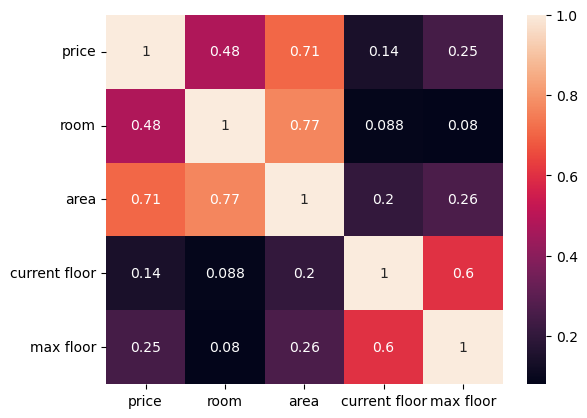

In [299]:
sns.heatmap(df.select_dtypes(['int','float']).corr(), annot=True)

plt.show()

In [300]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          2772 non-null   int32  
 1   location       2772 non-null   object 
 2   room           2772 non-null   int32  
 3   area           2772 non-null   float64
 4   current floor  2772 non-null   int32  
 5   max floor      2772 non-null   int32  
dtypes: float64(1), int32(4), object(1)
memory usage: 86.8+ KB


In [301]:
df['location'].value_counts()

location
Other                    233
Nəsimi r.                182
Şah İsmayıl Xətai m.     182
28 May m.                172
Nəriman Nərimanov m.     166
Elmlər Akademiyası m.    149
Həzi Aslanov m.          134
İnşaatçılar m.           126
Nərimanov r.             122
20 Yanvar m.             109
Nizami m.                 99
Ağ şəhər q.               95
8 Noyabr m.               89
Memar Əcəmi m.            75
Gənclik m.                75
Qara Qarayev m.           73
Əhmədli m.                70
Azadlıq Prospekti m.      61
Nardaran q.               61
Masazır q.                60
Xətai r.                  57
Xalqlar Dostluğu m.       53
Neftçilər m.              53
Yasamal r.                35
Yeni Yasamal q.           33
Bakıxanov q.              31
İçəri Şəhər m.            30
Nəsimi m.                 29
Yeni Günəşli q.           28
Səbail r.                 25
Yasamal q.                23
Bayıl q.                  21
Sahil m.                  21
Name: count, dtype: int64

In [302]:
from sklearn.preprocessing import LabelEncoder
df['location_encoded'] = LabelEncoder().fit_transform(df['location'])

In [303]:
df['price_log'] = np.log1p(df['price'])  
df['area_log'] = np.log1p(df['area'])

In [304]:
df['price_per_sqm'] = df['price'] / df['area']

In [305]:
df['room_area_ratio'] = df['room'] / df['area']  # Average room size
df['floor_ratio'] = df['current floor'] / df['max floor'] 

In [306]:
df

,price,location,room,area,current floor,max floor,location_encoded,price_log,area_log,price_per_sqm,room_area_ratio,floor_ratio
0,351000,28 May m.,3,135.0,7,16,1,12.768544,4.912655,2600.000000,0.022222,0.437500
1,52500,Masazır q.,2,55.0,5,6,10,10.868587,4.025352,954.545455,0.036364,0.833333
2,500000,Nəriman Nərimanov m.,4,160.0,7,8,15,13.122365,5.081404,3125.000000,0.025000,0.875000
3,145000,Qara Qarayev m.,2,52.0,15,17,20,11.884496,3.970292,2788.461538,0.038462,0.882353
4,2965000,Nizami m.,8,872.0,15,16,14,14.902388,6.771936,3400.229358,0.009174,0.937500
5,139000,20 Yanvar m.,2,48.0,5,20,0,11.842236,3.891820,2895.833333,0.041667,0.250000
6,1398000,Nərimanov r.,6,395.0,8,9,16,14.150554,5.981414,3539.240506,0.015190,0.888889
7,495000,Nəsimi r.,4,200.0,13,15,18,13.112315,5.303305,2475.000000,0.020000,0.866667
8,360000,Nəsimi r.,3,206.0,8,16,18,12.793862,5.332719,1747.572816,0.014563,0.500000
9,176000,Qara Qarayev m.,2,72.0,2,16,20,12.078245,4.290459,2444.444444,0.027778,0.125000


In [307]:
df['price_per_sqm_log'] = np.log1p(df['price_per_sqm'] - df['price_per_sqm'].min() + 1)

In [308]:
for col in df.select_dtypes(['int','float']).columns:
    print(f'{col} skewness: {df[col].skew()}')


price skewness: 6.206987259724806
room skewness: 0.7968047324338707
area skewness: 3.0104980519850946
current floor skewness: 0.6168326328341838
max floor skewness: -0.2219936007497724
location_encoded skewness: 0.16120179409879754
price_log skewness: -0.6152253987165541
area_log skewness: 0.28942368614781183
price_per_sqm skewness: 5.398051670304838
room_area_ratio skewness: 0.846451302139567
floor_ratio skewness: -0.05105720657562897
price_per_sqm_log skewness: -3.541736267985123


In [309]:
df.isnull().sum()

price                0
location             0
room                 0
area                 0
current floor        0
max floor            0
location_encoded     0
price_log            0
area_log             0
price_per_sqm        0
room_area_ratio      0
floor_ratio          0
price_per_sqm_log    0
dtype: int64

In [310]:
selected_columns = ['room', 'area_log', 'current floor', 'max floor', 
                    'location_encoded', 'price_per_sqm_log', 
                    'room_area_ratio', 'floor_ratio']

X = df[selected_columns]
y = df['price_per_sqm_log']

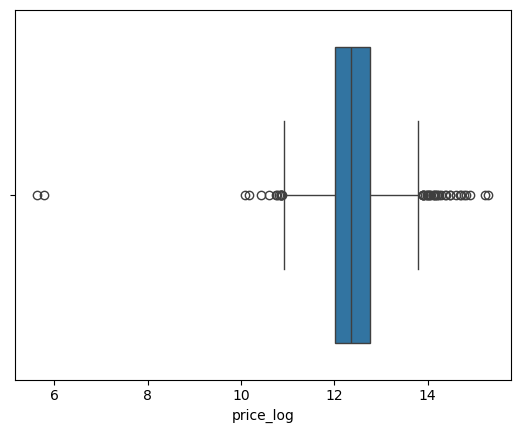

In [311]:
sns.boxplot(x=df['price_log'])
plt.show()

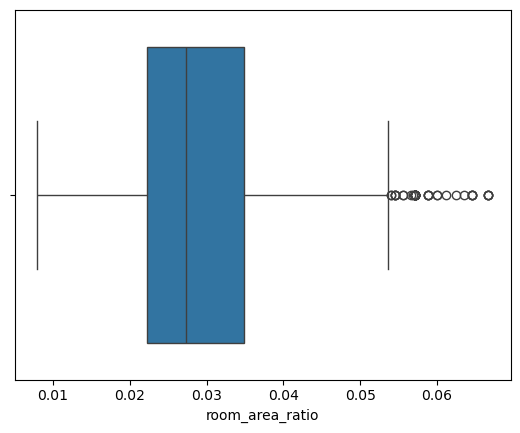

In [312]:
sns.boxplot(x=df['room_area_ratio'])
plt.show()

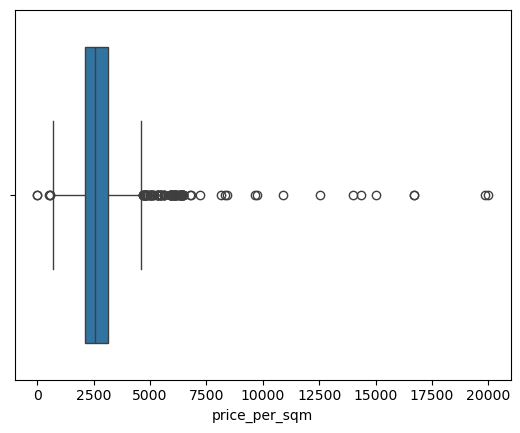

In [313]:
sns.boxplot(x=df['price_per_sqm'])
plt.show()

In [314]:
df.columns

Index(['price', 'location', 'room', 'area', 'current floor', 'max floor',
       'location_encoded', 'price_log', 'area_log', 'price_per_sqm',
       'room_area_ratio', 'floor_ratio', 'price_per_sqm_log'],
      dtype='object')

In [315]:
outlier_cols = ['room', 'area_log', 'price_per_sqm', 'room_area_ratio', 'floor_ratio']

In [316]:
def clip_outlier(df, cols):
    for col in cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR =  Q3 - Q1
        lower_bound = Q1 - 1.5*IQR
        upper_bound = Q3 - 1.5*IQR
        df[col] = np.clip(df[col], lower_bound, upper_bound)

In [317]:
clip_outlier(df, outlier_cols)

In [318]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [319]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [320]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [321]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [322]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

y_pred_rf = rf.predict(X_test)

mae = mean_absolute_error(y_test, y_pred_rf)
print(f"Mean Absolute Error: {mae}")

mse = mean_squared_error(y_test, y_pred_rf)
print(f"Mean Squared Error: {mse}")

r2 = r2_score(y_test, y_pred_rf)
print(f"R-squared: {r2}")

Mean Absolute Error: 0.0018570826934125246
Mean Squared Error: 0.00016093607081635268
R-squared: 0.9986651059714101


In [323]:
y_pred_lr = lr.predict(X_test)

mae = mean_absolute_error(y_test, y_pred_lr)
print(f"Mean Absolute Error: {mae}")

mse = mean_squared_error(y_test, y_pred_lr)
print(f"Mean Squared Error: {mse}")

r2 = r2_score(y_test, y_pred_lr)
print(f"R-squared: {r2}")

Mean Absolute Error: 9.905989942241036e-16
Mean Squared Error: 1.6672681834671116e-30
R-squared: 1.0


In [324]:
from sklearn.model_selection import cross_val_score
rf_cv_scores = cross_val_score(rf, X_scaled, y, cv=5, scoring='neg_mean_squared_error')
print(f"Random Forest Cross-Validation MSE: {rf_cv_scores.mean()}")

lr_cv_scores = cross_val_score(lr, X_scaled, y, cv=5, scoring='neg_mean_squared_error')
print(f"Linear Regression Cross-Validation MSE: {lr_cv_scores.mean()}")

Random Forest Cross-Validation MSE: -0.020443096629976343
Linear Regression Cross-Validation MSE: -1.8876867942588625e-30
